# 1. Reproducing Visualization

In [1]:
# import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the df
df = pd.read_csv('../data/makeovermonday/data/data_line_chart.csv')
df.head()

,year,united_states,russia,iran,china,canada,afghanistan,albania,algeria,angola,...,ussr,ukraine,united_arab_emirates,united_kingdom,uzbekistan,venezuela,vietnam,world,yemen,yugoslavia
0,1900,0.265826,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.265826,NaN,0.0
1,1901,0.294581,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.294581,NaN,0.0
2,1902,0.323337,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.323337,NaN,0.0
3,1903,0.352092,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.352092,NaN,0.0
4,1904,0.380848,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.380848,NaN,0.0


In [3]:
# df['year'] = pd.to_datetime(df['year'], format='%Y') # change to date time format, might have to change to the middle of the year though

In [4]:
df_pivot  = df.melt(id_vars = ['year'],
                    var_name = 'country',
                    value_name = 'Production (EJ)')
df_pivot.head()

,year,country,Production (EJ)
0,1900,united_states,0.265826
1,1901,united_states,0.294581
2,1902,united_states,0.323337
3,1903,united_states,0.352092
4,1904,united_states,0.380848


In [5]:
df_pivot = df_pivot[df_pivot['country'].isin(['united_states', 'russia', 'iran', 'china', 'canada'])]
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 0 to 614
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             615 non-null    int64  
 1   country          615 non-null    object 
 2   Production (EJ)  530 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 19.2+ KB


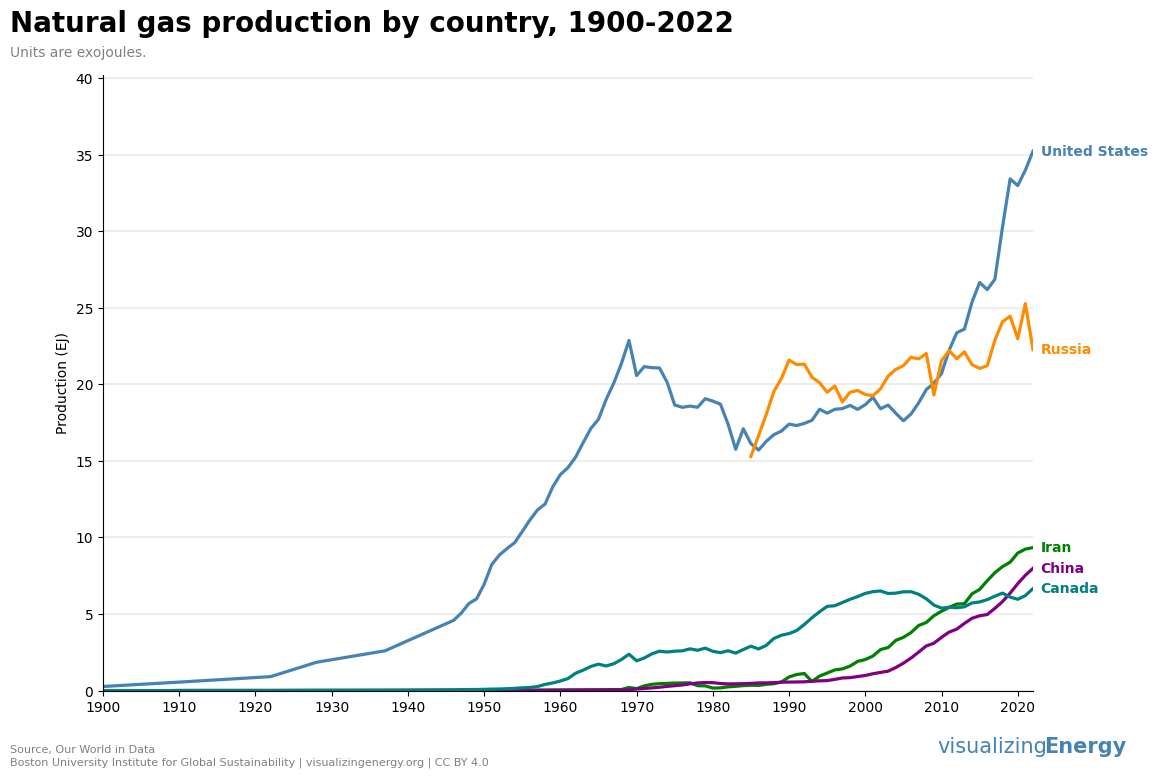

In [6]:
palette = {
    'united_states': 'steelblue',
    'russia': 'darkorange',
    'iran': 'green',
    'china': 'purple',
    'canada': 'teal'
}


plt.figure(figsize=(12, 8))
ax = sns.lineplot(data = df_pivot, x = 'year', y = 'Production (EJ)', hue = 'country', palette = palette, linewidth = 2.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(range(0, 45, 5))
plt.xticks(range(1900, 2030, 10))
plt.grid(True, axis='y', color='grey', linestyle='-', linewidth=0.2)  # Horizontal gridlines

# Add the first row of the title
plt.text(x = -0.1, y = 1.07, s = "Natural gas production by country, 1900-2022", fontsize = 20, ha = "left", weight = "bold", transform=plt.gca().transAxes)
# Add the second row of the title
plt.text(x = -0.1, y = 1.03, s = "Units are exojoules.", fontsize = 10, ha = "left", color = "gray", transform=plt.gca().transAxes)

# Add the first row of the Source
plt.text(x = -0.1, y = -0.1, s = "Source, Our World in Data", fontsize = 8, ha = "left", color = "gray", transform=plt.gca().transAxes)
# Add the second row of the Source
plt.text(x = -0.1, y = -0.12, s = "Boston University Institute for Global Sustainability | visualizingenergy.org | CC BY 4.0", 
         fontsize = 8, ha = "left", color = "gray", transform=plt.gca().transAxes)

# Add visualizingEnergy
plt.text(x = 1.015, y = -0.1, s = "visualizing", fontsize = 15, ha = "right", color = "steelblue", transform=plt.gca().transAxes)
plt.text(x = 1.1, y = -0.1, s = "Energy", fontsize = 15, ha = "right", color = "steelblue", weight = "bold",  transform=plt.gca().transAxes)

# Remove the legend
ax.get_legend().remove()

for country, color in palette.items():
    # Get the last value in the 'year' and 'Production (EJ)' for the specific country
    last_data = df_pivot[df_pivot['country'] == country].sort_values('year').iloc[-1]
    # Capitalize the first letter, replace underscores, and bold the text without LaTeX
    country_label = country.replace('_', ' ').title()
    plt.text(
        last_data['year'] + 1, last_data['Production (EJ)'], f"{country_label}",
        color=color, va='center', fontweight='bold'
    )
plt.xlim(1900, df_pivot['year'].max())
plt.ylim(0, df_pivot['Production (EJ)'].max() + 5)
ax.set_xlabel('')
plt.show()

# 2. Suggest improvements and enhance visualization
1. Ensure the use of distinct colors - Changed Canada's color to red for better visibility comparing to neighbouring lines.  
2. Added Vertical gridlines for better Readability  

In [ ]:
#Add vertical lines and annotations for key events
key_events = {
    '1920': 'Improved Pipeline Technology',
    '1970': 'Event A',
    '2010': 'Asia Economic Boom'
}

for date, event in key_events.items():
    plt.axvline(pd.to_datetime(date), color = "red", linestyle = '--')
    plt.annotate(event, (pd.to_datetime(date), df_pivot[df_pivot['year'] == date]['Production (EJ)'].values[0]),
                 xytext = (0, 10), textcoords = 'offset points', ha = 'center', color = "red")

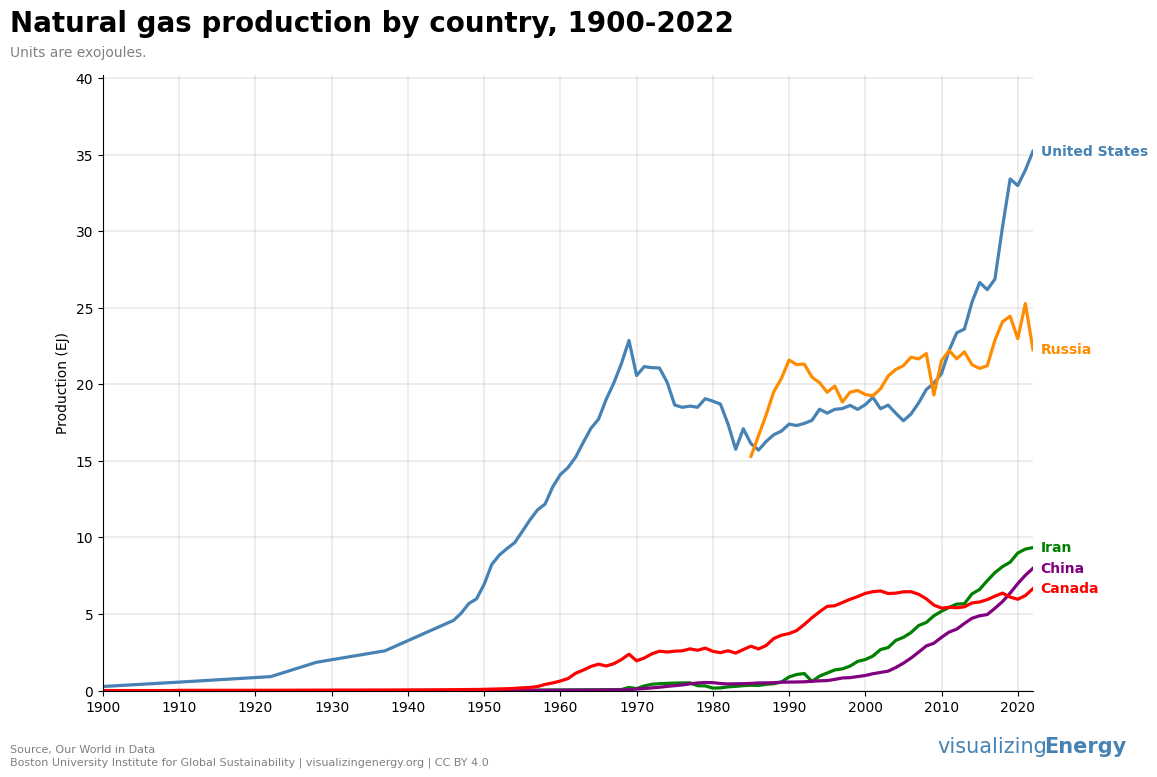

In [8]:
palette = {
    'united_states': 'steelblue',
    'russia': 'darkorange',
    'iran': 'green',
    'china': 'purple',
    'canada': 'red'
}

plt.figure(figsize=(12, 8))
ax = sns.lineplot(data = df_pivot, x = 'year', y = 'Production (EJ)', hue = 'country', palette = palette, linewidth = 2.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(range(0, 45, 5))
plt.xticks(range(1900, 2030, 10))
# Add "x" gridlines for better Readability
plt.grid(True, axis='both', color='grey', linestyle='-', linewidth=0.2)  # both gridlines

# Add the first row of the title
plt.text(x = -0.1, y = 1.07, s = "Natural gas production by country, 1900-2022", fontsize = 20, ha = "left", weight = "bold", transform=plt.gca().transAxes)
# Add the second row of the title
plt.text(x = -0.1, y = 1.03, s = "Units are exojoules.", fontsize = 10, ha = "left", color = "gray", transform=plt.gca().transAxes)

# Add the first row of the Source
plt.text(x = -0.1, y = -0.1, s = "Source, Our World in Data", fontsize = 8, ha = "left", color = "gray", transform=plt.gca().transAxes)
# Add the second row of the Source
plt.text(x = -0.1, y = -0.12, s = "Boston University Institute for Global Sustainability | visualizingenergy.org | CC BY 4.0", 
         fontsize = 8, ha = "left", color = "gray", transform=plt.gca().transAxes)

# Add visualizingEnergy
plt.text(x = 1.015, y = -0.1, s = "visualizing", fontsize = 15, ha = "right", color = "steelblue", transform=plt.gca().transAxes)
plt.text(x = 1.1, y = -0.1, s = "Energy", fontsize = 15, ha = "right", color = "steelblue", weight = "bold",  transform=plt.gca().transAxes)

# Remove the legend
ax.get_legend().remove()

for country, color in palette.items():
    # Get the last value in the 'year' and 'Production (EJ)' for the specific country
    last_data = df_pivot[df_pivot['country'] == country].sort_values('year').iloc[-1]
    # Capitalize the first letter, replace underscores, and bold the text without LaTeX
    country_label = country.replace('_', ' ').title()
    plt.text(
        last_data['year'] + 1, last_data['Production (EJ)'], f"{country_label}",
        color=color, va='center', fontweight='bold'
    )
    
plt.xlim(1900, df_pivot['year'].max())
plt.ylim(0, df_pivot['Production (EJ)'].max() + 5)
ax.set_xlabel('')
plt.show()